# day07_01_pandas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# 시각화 함수 호출 시에 바로 notebook에 표현하기
%matplotlib inline  

#### Series - pandas의 2가지 데이터 구조 중 하나로 하나의 열을 나타냅니다.

In [2]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
city_names

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [3]:
popluation = pd.Series([852469, 1015785, 485199])
popluation

0     852469
1    1015785
2     485199
dtype: int64

### 데이터 조작: 기본 산술 연산을 Series에 적용할 수 있습니다.

In [4]:
# 인구수(population)을 1000으로 나누어 주세요
popluation / 1000

0     852.469
1    1015.785
2     485.199
dtype: float64

### Dataframe은 행과 열로 이루어진 데이터 구조입니다.

In [5]:
df_cities = pd.DataFrame({'City names':city_names, 'Population': popluation})

#### 데이터 조회하기

In [6]:
# df_cities.loc[행, 열]
df_cities.loc[1, 'Population']

1015785

In [7]:
df_cities.loc[:, 'Population']

0     852469
1    1015785
2     485199
Name: Population, dtype: int64

In [8]:
# 실습하기. San jose를 loc를 이용하여 조회해주세요.
df_cities.loc[1, 'City names']

'San Jose'

In [9]:
popluation

0     852469
1    1015785
2     485199
dtype: int64

In [10]:
## 인구가 백만 명(대도시)을 초과하는지를 나타내는 새 Series 만들기
popluation.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [11]:
df_cities['is_big'] = popluation.apply(lambda val: val > 1000000)

In [12]:
df_cities

,City names,Population,is_big
0,San Francisco,852469,False
1,San Jose,1015785,True
2,Sacramento,485199,False


In [13]:
# 데이터 프레임에 열 추가하기
df_cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
df_cities

,City names,Population,is_big,Area square miles
0,San Francisco,852469,False,46.87
1,San Jose,1015785,True,176.53
2,Sacramento,485199,False,97.92


### 실습하기.
#### 다음 두 명제 모두 True인 경우에만 True인 새 논리형 열을 추가해주세요
- 도시 이름은 성인의 이름을 본따서 지었다.
- 도시 면적(Area square miles)이 50마일보다 넓다.  
---
- 참고: 스페인어에서 'San'은 성인이라는 의미입니다.
- 참고: &를 이용하여 AND 조건문을 만들 수 있습니다.

In [14]:
# 값의 시작 유무를 확인하는 함수
'San Francisco'.startswith('San')

True

In [15]:
# AND 조건문(두 조건 중 하나만 False여도 False)
True & False

False

In [16]:
df_cities

,City names,Population,is_big,Area square miles
0,San Francisco,852469,False,46.87
1,San Jose,1015785,True,176.53
2,Sacramento,485199,False,97.92


In [17]:
df_cities.loc[:, 'Area square miles'] > 50

0    False
1     True
2     True
Name: Area square miles, dtype: bool

In [18]:
df_cities.loc[:, 'City names'].apply(lambda a: a.startswith('San'))

0     True
1     True
2    False
Name: City names, dtype: bool

In [19]:
df_cities['is wide'] =  (df_cities.loc[:, 'Area square miles'] > 50) & (df_cities.loc[:, 'City names'].apply(lambda a: a.startswith('San')))

In [20]:
df_cities

,City names,Population,is_big,Area square miles,is wide
0,San Francisco,852469,False,46.87,False
1,San Jose,1015785,True,176.53,True
2,Sacramento,485199,False,97.92,False


In [21]:
# 켈리포니아 집값 데이터 로드하기
df = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/google/california_housing_train.csv')

In [22]:
# 상위 5개만 보기
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [23]:
# 각 열의 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16999 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  int64  
 3   total_rooms         17000 non-null  int64  
 4   total_bedrooms      17000 non-null  int64  
 5   population          17000 non-null  int64  
 6   households          17000 non-null  int64  
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [24]:
# 결측치(비어있는 값) 확인하기
df.isnull().sum()

longitude             1
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [25]:
# 실습하기. -118.41로 결측치에 값을 채워주세요.
# - 그냥하면 조회, = 하면 데이터 입력
# df에서 [비어있는 행 조건, 열]
df.loc[df.loc[:, 'longitude'].isnull(), 'longitude'] = -118.41

In [26]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [27]:
# 데이터를 지도 이미지 위에 표현하기
import matplotlib.image as mpimg
back_img = mpimg.imread('https://raw.githubusercontent.com/luxdolorosa/data_set/master/google/california.png')

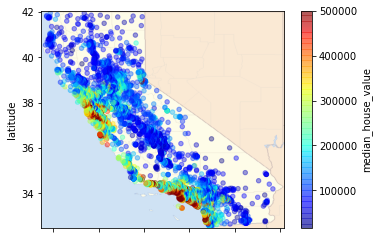

In [28]:
# 위도와 경도를 이용하여 산포도를 만들기
df.plot(kind='scatter'
        , x='longitude'
        , y='latitude'
        , alpha=0.4
        , c='median_house_value'
        , cmap=plt.get_cmap('jet')
       )

plt.imshow(back_img, alpha=0.5, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

In [29]:
# 집값에 영향을 미치는 상관도를 구하기
# - 상관계수 구하기
corr_matrix = df.corr()
corr_matrix.loc['median_house_value', :]

longitude            -0.044982
latitude             -0.144917
housing_median_age    0.106758
total_rooms           0.130991
total_bedrooms        0.045783
population           -0.027850
households            0.061031
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [30]:
# 방 갯수 / 가정 수
# - 가정수에 따른 방 갯수 구하기
df.loc[:, 'room_per_households'] =  df.loc[:, 'total_rooms'] / df.loc[:, 'households']

In [31]:
# 침수실 / 전체 방
# - 방 대비 침실수가 적으면 집이 크다.
# - 여기서 침실 수는 실제 침실 수만 체크
df.loc[:, 'bedrooms_per_room'] = df.loc[:, 'total_bedrooms'] / df.loc[:, 'total_rooms']

In [32]:
# 인구수 / 가정수
# 각 가정별 인구수
df.loc[:, 'population_per_household'] = df.loc[:, 'population'] / df.loc[:, 'households']

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_households,bedrooms_per_room,population_per_household
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,11.889831,0.228617,2.150424
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,16.522678,0.248497,2.438445
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,6.153846,0.241667,2.846154
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,6.641593,0.224517,2.278761
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,5.549618,0.224209,2.381679


In [34]:
# 새로 만들어진 칼럼의 상관계수 구하기
corr_matrix = df.corr()
corr_matrix.loc[:, 'median_house_value'].sort_values()

bedrooms_per_room          -0.258190
latitude                   -0.144917
longitude                  -0.044982
population_per_household   -0.042764
population                 -0.027850
total_bedrooms              0.045783
households                  0.061031
housing_median_age          0.106758
total_rooms                 0.130991
room_per_households         0.150081
median_income               0.691871
median_house_value          1.000000
Name: median_house_value, dtype: float64